# 변수 선택

## 필터 기법 


### 1. 필요 라이브러리 임포트 

In [3]:
import pandas as pd # pandas package
# import numpy as np  # numpy package : np.nan 이용 결측값 생성 
# import scipy.stats as stats 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
%matplotlib inline
import seaborn as sns # seaborn 시각화 패키지 

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

### 2. 붓꽃 데이터 로드 

- 붓꽃 데이터는 통계학자 피셔(R.A Fisher)의 붓꽃의 분류 연구에 기반한 데이터다. load_iris() 명령으로 로드한다. 데이터는 다음과 같이 구성되어 있다.

- 타겟 데이터 : setosa, versicolor, virginica의 세가지 붓꽃 종(species)

- 특징 데이터 : 꽃받침 길이(Sepal Length), 꽃받침 폭(Sepal Width), 꽃잎 길이(Petal Length), 꽃잎 폭(Petal Width)

In [4]:
#iris 붓꽃 데이터 로드 
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.DESCR) # 붓꽃 데이터 상세 정보 

In [5]:
# 붓꽃 데이터 특성 확인 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 3. 데이터 프레임 변환 

In [6]:
# 데이터 생성 및 준비 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

# 필터 명 정의 
cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 4. 필터 기법 이용한 변수 선택 

### 1) 분산을 이용한 필터 기법 

####  VarianceThreshold : 분산이 기준치보다 낮은 특징 데이터는 사용하지 않는 방법

In [7]:
# Scikit-learn의 VarianceThreshold 사용 
from sklearn.feature_selection import VarianceThreshold

In [12]:
# 분산 스레스 홀더 생성 
selector = VarianceThreshold()

# Threshold 설정 없이 분산 산출 
selector.fit(df[cols]) 

print(selector.variances_)

[0.68112222 0.18871289 3.09550267 0.57713289]


In [17]:
# threshold 설정 
selector.set_params(threshold = 0.6)

# refit and transform 
v_sel = selector.fit_transform(df[cols])

# 분산 확인 
print(selector.variances_)

# 분산이 임계치 보다 낮은 feature 확인(True : 높음, False : 낮음)
print(selector.get_support())	

[0.68112222 0.18871289 3.09550267 0.57713289]
[ True False  True False]


In [21]:
# 특성 필터 하여 데이터 프레임에 저장 
iris_sel_df = df.iloc[:, [0, 2]]
iris_sel_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [23]:
# 결과 데이터 프레임 생성 
iris_sel_df = pd.concat([iris_sel_df, df[['species']]], axis = 1)
iris_sel_df.head()

,sepal length (cm),petal length (cm),species,species
0,5.1,1.4,setosa,setosa
1,4.9,1.4,setosa,setosa
2,4.7,1.3,setosa,setosa
3,4.6,1.5,setosa,setosa
4,5.0,1.4,setosa,setosa


### 2) 큰 상관 계수(Correlation)을 이용한 필터 기법 
#### 데이터 셋에서 'sepal length (cm)' 속성과 상관계수가 0.6 보다 큰 속성들을 필터링 
#### '3.데이터 프레임 변환'의 df 사용 

In [28]:
# iris df 데이터 프레임 확인 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
# 상관계수 생성 
cor = df.corr() 
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


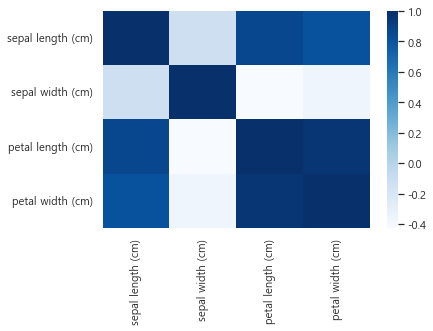

In [42]:
# 히드맵으로 상관관계 가시화 
sns.heatmap(cor, annot = False, cmap = plt.cm.Blues)
plt.show()

In [44]:
# 'sepal length (cm)' 속성의 상관관계 정의  
cor_target = abs(cor['sepal length (cm)'])
print(cor_target)

sepal length (cm)    1.000000
sepal width (cm)     0.117570
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [35]:
#상관관계가 0.6보다 큰 속성 확인 
cor_target[cor_target > 0.6]

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64

In [48]:
# 상관관계가 0.6보다 큰 속성 확인
selected_cols = cor_target[cor_target > 0.6]
print("상관관계 게수 > 0.6 인 속성")
print(selected_cols)

상관관계 게수 > 0.6 인 속성
sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [49]:
selected_cols.index

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [50]:
df[selected_cols.index].head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [51]:
# 필터링 딘 속성을 df_cor_sel에 저장 
df_cor_sel = df[selected_cols.index]
df_cor_sel.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [3]:
from sklearn.feature_selection import chi2, SelectKBest
selector1 = SelectKBest(chi2, k=14330)
X_train1 = selector1.fit_transform(X_train, y_train)
X_test1 = selector1.transform(X_test)

NameError: name 'X_train' is not defined

Wrapper method

RFE(recursive feature elimination)
출처: https://dyddl1993.tistory.com/18 [새우위키:티스토리]

In [ ]:
from sklearn.feature_selection import RFE
RFE = RFE(model, n_features_to_select=20)
X_train_RFE = RFE.fit_transform(X_train,y_train)
X_test_RFE = RFE.transform(X_test)
출처: https://dyddl1993.tistory.com/18 [새우위키:티스토리]

Embedded method